In [77]:
import pandas as pd
import geopandas as gpd

sample = "C://Users//82106//Downloads//_census_data_2021_bnd_oa_bnd_oa_11_2021_2021//bnd_oa_11_2021_2021_2Q.shp"
seoul = gpd.read_file(sample)
seoul = pd.DataFrame(seoul)
seoul = seoul.drop(['BASE_DATE','ADM_CD'],axis=1)
#seoul.info() #18718

sucs = pd.read_csv("C://Datacampus_project//사업체수.csv")
sucs['집계구번호'] = sucs['집계구번호'].astype(str)
#sucs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18718 entries, 0 to 18717
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TOT_REG_CD  18718 non-null  object  
 1   geometry    18718 non-null  geometry
dtypes: geometry(1), object(1)
memory usage: 292.6+ KB


In [71]:
Geometries = pd.Series(seoul.geometry.values, index=seoul.TOT_REG_CD).to_dict()


from shapely import wkt

def geo(a):
    newcolumn=[]
    for n in a:
        m= Geometries[n]
        newcolumn.append(m)
    return(newcolumn)

sucs['Geometry'] = geo(sucs['집계구번호'])

C:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


<AxesSubplot:>

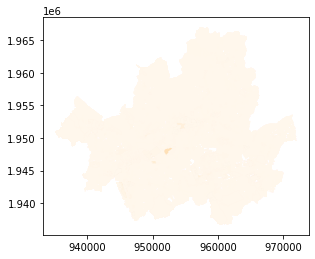

In [72]:
sucs['Geometry'] = sucs['Geometry'].astype(str)
sucs['geometry'] = sucs['Geometry'].apply(wkt.loads)
sucs_gdf = gpd.GeoDataFrame(sucs, crs='epsg:4326')
#sucs_gdf.info()

sucs_gdf.plot(column='사업체수', cmap="OrRd",aspect=1)

<AxesSubplot:>

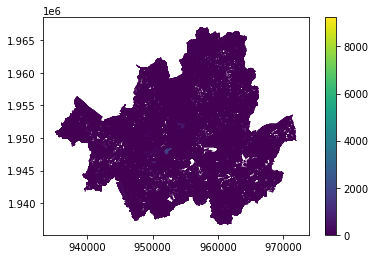

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)

sucs_gdf.plot(column='사업체수',ax=ax, aspect=1, legend=True)


In [76]:
# max종사자수 서로 다른색으로 시각화

f = pd.read_table("C://Users//82106//Downloads//_census_reqdoc_1659063002585//original//11_2019년_산업분류별(10차_대분류)_종사자수.txt",sep='^',header=None)
f = f.fillna(0)
f = f.iloc[:,1:]
f.iloc[:,0] = f.iloc[:,0].map(str)
f['읍면동코드'],f['일련번호'] = map(f.iloc[:,0].str.slice,[0,7],[7,12])
집계구번호 = f.iloc[:,0]
#print(집계구번호)

d = pd.read_excel("C://Users//82106//Downloads//ref_code//original//adm_code.xls",sheet_name='2019년6월')
d = d[d.iloc[:,0]=='11'] #서울특별시 정보만 추출
d = d.iloc[:,2:] #시도코드, 시도명칭 삭제
#print(d)

g = pd.read_excel("C://Users//82106//Downloads//ref_code//original//statistics_code.xls",sheet_name='집계구')
g = g.iloc[:,2:]
g = g[g.iloc[:,1].str.contains("cp_bem_")] #원하는 종사자수 코드를 가진 row만 추출
g = g.tail(20)
#print(g)

merge1 = pd.merge(f,d,left_on='읍면동코드',right_on=d.iloc[:,2],how='left')
merge1 = merge1.iloc[:,[0,2,4,6,8]]
merge2 = pd.merge(f,g,left_on=f.iloc[:,1],right_on=g.iloc[:,1],how='left')
merge2 = merge2.iloc[:,[1,6]]
jong_sa_ja_soo = pd.concat([merge1,merge2],axis=1,join='inner')
jong_sa_ja_soo = jong_sa_ja_soo.iloc[:,[1,2,3,4,6]]
names = ['종사자수','일련번호','구이름','동이름','산업종류']
jong_sa_ja_soo.columns = names
names = names[1:]+names[:1]
jong_sa_ja_soo = jong_sa_ja_soo[names]

jong_sa_ja_soo['집계구번호'] = 집계구번호
jong_sa_ja_soo = jong_sa_ja_soo.drop('일련번호',axis=1)


jsjs = jong_sa_ja_soo.groupby(['동이름'])['종사자수'].transform(max) == jong_sa_ja_soo['종사자수']
jsjs2 =  jong_sa_ja_soo[jsjs]
#jsjs2.info()

Geometries = pd.Series(seoul.geometry.values, index=seoul.TOT_REG_CD).to_dict()


from shapely import wkt

def geo(a):
    newcolumn=[]
    for n in a:
        m= Geometries[n]
        newcolumn.append(m)
    return(newcolumn)

jsjs2['Geometry'] = geo(jsjs2['집계구번호'])


jsjs2['Geometry'] = jsjs2['Geometry'].astype(str)
jsjs2['geometry'] = jsjs2['Geometry'].apply(wkt.loads)
jsjs2_gdf = gpd.GeoDataFrame(jsjs2, crs='epsg:4326')
#jsjs2

#jsjs2_gdf.plot(column='산업종류', cmap="OrRd",aspect=1)


#fig, ax = plt.subplots(1,1)
#jsjs2_gdf.plot(column='산업종류',ax=ax, aspect=1, legend=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15532\2308586280.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jsjs2['Geometry'] = geo(jsjs2['집계구번호'])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15532\2308586280.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jsjs2['Geometry'] = jsjs2['Geometry'].astype(str)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15532\2308586280.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,구이름,동이름,산업종류,종사자수,집계구번호,Geometry,geometry
12,용산구,이태원1동,"공공행정, 국방 및 사회보장 행정",1223.0,1103065010008,POLYGON ((955062.5935993195 1948155.8421993256...,"POLYGON ((955062.59360 1948155.84220, 955091.0..."
13,마포구,연남동,숙박 및 음식점업,338.0,1114071010002,POLYGON ((949347.2728023529 1951587.9550991058...,"POLYGON ((949347.27280 1951587.95510, 949361.5..."
35,성동구,성수2가3동,사업시설관리 및 사업지원 서비스업,2768.0,1104068010010,"POLYGON ((961101.8743991852 1949770.10090065, ...","POLYGON ((961101.87440 1949770.10090, 961099.5..."
362,강동구,상일동,보건업 및 사회복지 서비스업,1462.0,1125052010004,POLYGON ((970290.5095005035 1950650.1592998505...,"POLYGON ((970290.50950 1950650.15930, 970301.6..."
498,양천구,신월4동,운수업,384.0,1115060010005,POLYGON ((941446.1182994843 1947130.8723011017...,"POLYGON ((941446.11830 1947130.87230, 941443.8..."
...,...,...,...,...,...,...,...
99760,용산구,남영동,도매 및 소매업,2018.0,1103053010012,POLYGON ((953474.9873000002 1950352.3692000005...,"POLYGON ((953474.98730 1950352.36920, 953474.6..."
99868,노원구,상계9동,교육 서비스업,508.0,1111073010001,"POLYGON ((961292.0853023529 1963200.430902481,...","POLYGON ((961292.08530 1963200.43090, 961330.5..."
99873,서대문구,남가좌2동,교육 서비스업,1488.0,1113070010001,POLYGON ((949080.3699016571 1953706.0051021576...,"POLYGON ((949080.36990 1953706.00510, 949085.1..."
100045,노원구,하계2동,교육 서비스업,194.0,1111059010003,"POLYGON ((961375.677400589 1959713.7347011566,...","POLYGON ((961375.67740 1959713.73470, 961367.3..."


In [101]:
##############################################################
############NEW################################################

import pandas as pd
import geopandas as gpd

sample = "C://Users//82106//Downloads//EMD_20220324//emd.shp"
seoul = gpd.read_file(sample)
seoul = pd.DataFrame(seoul)
#seoul = seoul.drop(['EMD_ENG_NM','EMD_KOR_NM'],axis=1)
#seoul.info()
seoul

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,Ã»¿îµ¿,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,Singyo-dong,½Å±³µ¿,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,Gungjeong-dong,±ÃÁ¤µ¿,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,11110104,Hyoja-dong,È¿ÀÚµ¿,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,Changseong-dong,Ã¢¼ºµ¿,"POLYGON ((953516.123 1953734.362, 953516.526 1..."
...,...,...,...,...
5049,50130250,Daejeong-eup,´ëÁ¤À¾,"MULTIPOLYGON (((881168.350 1472982.219, 881161..."
5050,50130253,Namwon-eup,³²¿øÀ¾,"MULTIPOLYGON (((910755.915 1486589.634, 910923..."
5051,50130259,Seongsan-eup,¼º»êÀ¾,"MULTIPOLYGON (((943356.999 1498892.763, 943357..."
5052,50130310,Andeok-myeon,¾È´ö¸é,"MULTIPOLYGON (((888981.846 1471424.888, 888979..."


In [94]:
#읍면동 코드를 기준으로 동 지도데이터와 병합




f = pd.read_table("C://Users//82106//Downloads//_census_reqdoc_1659063002585//original//11_2019년_산업분류별(10차_대분류)_종사자수.txt",sep='^',header=None)
f = f.fillna(0)
f = f.iloc[:,1:]
f.iloc[:,0] = f.iloc[:,0].map(str)
f['읍면동코드'],f['일련번호'] = map(f.iloc[:,0].str.slice,[0,7],[7,12])
EMD_CD = f.iloc[:,0].str.slice(0,8)
#print(EMD_CD)
#print(f)

d = pd.read_excel("C://Users//82106//Downloads//ref_code//original//adm_code.xls",sheet_name='2019년6월')
d = d[d.iloc[:,0]=='11'] #서울특별시 정보만 추출
d = d.iloc[:,2:] #시도코드, 시도명칭 삭제
#print(d)

g = pd.read_excel("C://Users//82106//Downloads//ref_code//original//statistics_code.xls",sheet_name='집계구')
g = g.iloc[:,2:]
g = g[g.iloc[:,1].str.contains("cp_bem_")] #원하는 종사자수 코드를 가진 row만 추출
g = g.tail(20)
#print(g)



                    1           2      3    읍면동코드   일련번호
0       1114070010026  cp_bem_006    0.0  1114070  01002
1       1115057010032  cp_bem_012    0.0  1115057  01003
2       1124055010013  cp_bem_013    0.0  1124055  01001
3       1123065010003  cp_bem_009  127.0  1123065  01000
4       1118060010003  cp_bem_003    0.0  1118060  01000
...               ...         ...    ...      ...    ...
103545  1117074020102  cp_bem_999    0.0  1117074  02010
103546  1117074020203  cp_bem_999    0.0  1117074  02020
103547  1117074020201  cp_bem_999    0.0  1117074  02020
103548  1119069020008  cp_bem_999    0.0  1119069  02000
103549  1119069020107  cp_bem_999    0.0  1119069  02010

[103550 rows x 5 columns]


In [96]:

#merge the dataframe
merge1 = pd.merge(f,d,left_on='읍면동코드',right_on=d.iloc[:,2],how='left')
merge1 = merge1.iloc[:,[0,2,3,6,8]]
merge2 = pd.merge(f,g,left_on=f.iloc[:,1],right_on=g.iloc[:,1],how='left')
merge2 = merge2.iloc[:,[1,6]]
jong_sa_ja_soo = pd.concat([merge1,merge2],axis=1,join='inner')
jong_sa_ja_soo = jong_sa_ja_soo.iloc[:,[1,2,3,4,6]]

names = ['종사자수','읍면동코드','구이름','동이름','산업종류']
jong_sa_ja_soo.columns = names
names = names[1:]+names[:1]
jong_sa_ja_soo = jong_sa_ja_soo[names]
jsjs = jong_sa_ja_soo.groupby(['동이름'])['종사자수'].transform(max) == jong_sa_ja_soo['종사자수']
jsjs2 =  jong_sa_ja_soo[jsjs]

jsjs2['읍면동코드'] = jsjs2['읍면동코드'].astype(str)
#jsjs2.info()


jsjs2['EMD_CD'] = EMD_CD
jsjs2

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15532\993045471.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jsjs2['읍면동코드'] = jsjs2['읍면동코드'].astype(str)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15532\993045471.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jsjs2['EMD_CD'] = EMD_CD


,읍면동코드,구이름,동이름,산업종류,종사자수,EMD_CD
12,1103065,용산구,이태원1동,"공공행정, 국방 및 사회보장 행정",1223.0,11030650
13,1114071,마포구,연남동,숙박 및 음식점업,338.0,11140710
35,1104068,성동구,성수2가3동,사업시설관리 및 사업지원 서비스업,2768.0,11040680
362,1125052,강동구,상일동,보건업 및 사회복지 서비스업,1462.0,11250520
498,1115060,양천구,신월4동,운수업,384.0,11150600
...,...,...,...,...,...,...
99760,1103053,용산구,남영동,도매 및 소매업,2018.0,11030530
99868,1111073,노원구,상계9동,교육 서비스업,508.0,11110730
99873,1113070,서대문구,남가좌2동,교육 서비스업,1488.0,11130700
100045,1111059,노원구,하계2동,교육 서비스업,194.0,11110590


In [97]:
Geometries = pd.Series(seoul.geometry.values, index=seoul.EMD_CD).to_dict()


from shapely import wkt

def geo(a):
    newcolumn=[]
    for n in a:
        m= Geometries[n]
        newcolumn.append(m)
    return(newcolumn)

jsjs2['Geometry'] = geo(jsjs2['EMD_CD'])
jsjs2

jsjs2['Geometry'] = jsjs2['Geometry'].astype(str)
jsjs2['geometry'] = jsjs2['Geometry'].apply(wkt.loads)
jsjs2_gdf = gpd.GeoDataFrame(jsjs2, crs='epsg:4326')

KeyError: '11030650'

In [100]:
Geometries['11110590']

KeyError: '11110590'